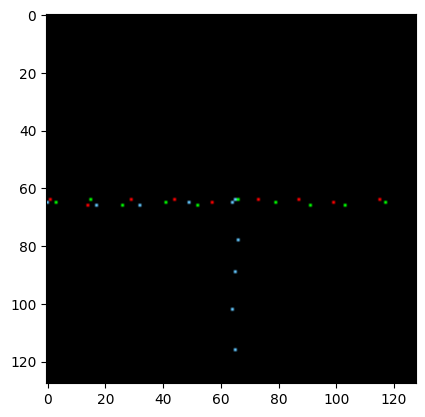

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi
import random

random.seed(777)

N = 3
paths = []

counts = [45, 40, 39]
offsets = [0.5, 0, 0.3]

path1 = np.linspace(0, 1, 10)
path1 = np.repeat(path1, 2).reshape(-1, 2)
path1[:, 0] = 0.5
path1 += np.random.rand(*path1.shape) * .02


path2 = np.linspace(.01, 1, 11)
path2 = np.repeat(path2, 2).reshape(-1, 2)
path2[:, 0] = 0.5
path2 += np.random.rand(*path2.shape) * .02

path3a = np.linspace(0, 0.5, 5)
path3a = np.repeat(path3a, 2).reshape(-1, 2)
path3a[:, 0] = 0.5
path3b = np.linspace(0.5, 1, 6)
path3b = np.repeat(path3b, 2).reshape(-1, 2)
path3b[:, 1] = 0.5
path3 = np.concatenate([path3a, path3b], axis=0)
path3 += np.random.rand(*path3.shape) * .02


paths = [path1, path2, path3]

w, h = 128, 128
img = np.zeros((w, h, 3), dtype=np.uint8)

colors = np.array([[255, 0, 0], [0, 255, 0], [100, 200, 255]], dtype=np.uint8)

for i, path in enumerate(paths):
    for point in path:
        xy = (int(point[0] * w), int(point[1] * h))
        if xy[0] < 0 or xy[1] < 0 or xy[0] >= w or xy[1] >= h:
            continue
        img[xy] = colors[i]

plt.imshow(img)

In [30]:
routes = []
routes_slopes = []
routes_dists = []
threshold = 0.1

def get_matching_route(routes, point, slope):
    for i, (route, route_slopes, route_dists) in enumerate(zip(routes, routes_slopes, routes_dists)):
        for rp, rs, rd in zip(route, route_slopes, route_dists):
            close = (rp[0] - point[0])**2 + (rp[1] - point[1])**2 < threshold
            if close:
                return i
    return None
        
for path in paths:
    cur_route = None
    cur_idx = None
    for i, cur in enumerate(path):
        prv = path[i - 1] if i > 0 else None
        nxt = path[i + 1] if i < len(path) - 1 else cur + cur - prv
        prv = cur + (cur - nxt) if prv is None else prv
        
        match = get_matching_route(routes, nxt - prv / 2, 0)
        
        if match is not None and match != cur_idx:
            if cur_route is not None:
                if cur_idx is not None:
                    routes[cur_idx] = cur_route
                else:
                    routes.append(cur_route)
            cur_route = list(routes[match])
            cur_route.append(cur)
            cur_idx = match
        else:
            cur_route = [cur]
            cur_idx = None
    if cur_route is not None:
        if match is not None:
            routes[match] = cur_route
        else:
            routes.append(cur_route)
print(routes)


[[array([0.51361177, 1.01825479])], [array([0.50112409, 1.00130897])], [array([1.00063431, 0.51360701])]]


In [25]:
distances = np.linalg.norm(path1[:, np.newaxis, :] - path3[np.newaxis, :, :], axis=2)

print(distances.shape)
print(np.min(distances, axis=1))



(10, 11)
[0.00962651 0.01537398 0.03442311 0.03737874 0.05370652 0.04630769
 0.15647981 0.2694926  0.38703815 0.49880462]
